In [318]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import re, datetime
from lifelines import KaplanMeierFitter
from datetime import date, timedelta

In [327]:
dict1={
"4.3" : "26-6-2013 20:00:00" ,
"4.4" :  "25-6-2014 12:15:00" ,
"4.5" : "24-6-2015 20:00:00" ,
"4.6" :"22-6-2016 11:00:00",
"4.7" :  "28-6-2017 09:50:00"
}

In [328]:
arr=[
"4.4" ,
"4.5" ,
"4.6"  ,
"4.7",
"4.8" 
]

In [369]:
dates=[
    "26-6-2013" ,
 "25-6-2014" ,
 "24-6-2015" ,
"22-6-2016",
  "28-6-2017",
  "27-6-2018",
 "27-6-2019"
]

In [329]:
def keepVal(activity):
    if activity=='NEW'or activity=='Assignee':
        return 1
    return 0

In [330]:
dX=pd.read_csv('db\\EC3.csv')


In [331]:
#read the CSV file
df=pd.read_csv('db\\EC3.csv')

df['creation_ts']=pd.to_datetime(df['creation_ts'])

In [332]:
df = df[df['creation_ts']>='01-01-2013 00:00:00']

In [333]:
allD=df

In [334]:
len(df.bug_id.unique())

21638

In [335]:
df['keep']=df.apply(lambda x : keepVal(x['activity']), axis=1)
df = df[df['keep']==1]
df = df[['When', 'Who', 'activity', 'bug_id', 'bug_severity', 'bug_status',
       'creation_ts', 'resolution', 'version']]

In [336]:
df1=df
df2=df

In [337]:
df2=df2.groupby(by='bug_id', as_index=False).agg({'activity': pd.Series.nunique})
df2 = df2[df2['activity']!=2]

In [338]:
dfList = df2['bug_id'].tolist()

In [339]:
gap =allD[~allD.bug_id.isin(dfList)]

In [340]:
df=gap

In [341]:
df['When']=pd.to_datetime(df['When'])
df['creation_ts']=pd.to_datetime(df['creation_ts'])

C:\Users\zeinab\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\zeinab\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [342]:
xData=pd.DataFrame()
id_before_release=0
id_after_release=0
id_RBRB=0
id_RBFB=0
id_RBRA=0
id_RBFA=0
id_RARA=0
id_RAFA=0
c= -1
for x in dict1:
    data=pd.DataFrame()
    c=c+1
    for i in range(12):
        start_date = dict1[x]
        #print(start_date)
        date_time_obj = datetime.datetime.strptime(start_date, '%d-%m-%Y %H:%M:%S')
        #print('st',date_time_obj)
        k=date_time_obj + timedelta(30*i)
        l=date_time_obj + timedelta(30*(i+1))
        
        version= x
        #print('version', x)
        #print(i,k,l)
   # print(x,dict[x])
    #mask = (df['creation_ts'] > start_date) & (df['creation_ts'] <= end_date) & (("4.4.1"==df['version'])  | ("4.4"==df['version']))
    #mask = (df['creation_ts'] > start_date) & (df['creation_ts'] <= end_date) & ("4.4"==df['version'])
        mask= (version==df['version'])  
    #the bug before release 
   # maskp = (version==df['version'])  & (df['creation_ts'] < start_date)
    #the bug after release 
        #maskp = (version==df['version'])  & (df['creation_ts'] >= k)  & (df['creation_ts'] <= l)
        #maskp =  (df['creation_ts'] >= k)  & (df['creation_ts'] <= l)
      
        #maskp = (df['version'] != arr[c]) & (df['creation_ts'] >= k)  & (df['creation_ts'] <= l)
        #maskp = (df['version'] == version) & 
        maskp =(df['creation_ts'] >= k)  & (df['creation_ts'] <= l)
        #maskpp = (version==df['version'])  & (df['creation_ts'] >= start_date)  & (df['creation_ts'] > k)




        dff = df.loc[mask]
        dffp = df.loc[maskp]
       # dffpp = df.loc[maskpp]

        id_RF=dffp.bug_id.unique()
       # id_RS=dffpp.bug_id.unique()

    
        TOTAL=len(id_RF)
        data=pd.DataFrame({"version": [version] , "total":[ TOTAL] , 'id_RF':[id_RF], "month":i+1 
  # , 'id_RS':[id_RS]
  
            
   })
    

        xData=xData.append(data)

In [346]:
#xData

In [347]:
counter=0
total=pd.DataFrame()
data=pd.DataFrame()
for index, row in xData.iterrows():
    df3=df[df.bug_id.isin(row['id_RF'])]
   # print(len(row['id_RAFA']))
    version=row['version']
    month=row['month']
    df3['keep']=df3.apply(lambda x : keepVal(x['activity']), axis=1)
    df3 = df3[df3['keep']==1]
    df3 = df3[['When', 'activity', 'bug_id']]

    df3['When']=pd.to_datetime(df3['When'])
    #print (df3.groupby('bug_id').groups)
    df3=df3.groupby(['bug_id','activity'])['When'].min().reset_index()
    df3['diff'] = df3.groupby('bug_id')['When'].transform(lambda x: (x.max()-x.min()).days)
    df3=df3.groupby('bug_id').first().reset_index()
    df3= df3[['bug_id',
     'When',
     'diff']]
    df3['month'] = row['month']
    df3['version'] = row['version']
    counter=counter+1
    total=total.append(df3)
    if counter==12 :
        total.to_csv('RQ3\\aEclipse-RF_'+str(version)+'.csv',index=False)
        counter=0
        total=pd.DataFrame()
    
#fg=tData[0]

C:\Users\zeinab\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [348]:
draft1 = pd.read_csv('RQ3\\aEclipse-RF_4.3.csv')
draft2 = pd.read_csv('RQ3\\aEclipse-RF_4.4.csv')
draft3 = pd.read_csv('RQ3\\aEclipse-RF_4.5.csv')
draft4 = pd.read_csv('RQ3\\aEclipse-RF_4.6.csv')
draft5 = pd.read_csv('RQ3\\aEclipse-RF_4.7.csv')
#draft6 = pd.read_csv('RQ3\\aEclipse-RF_4.8.csv')

In [349]:
allx=[draft1,draft2,draft3,draft4,draft5]

In [234]:
x=draft3[draft3['month']==8]
x['diff'].quantile(.75)

3.25

In [132]:
x=draft3[draft3['month']==5]
x['diff'].quantile(.75)

98.0

In [196]:
cols = ['c1', 'c2', 'c3']
df2 = pd.DataFrame(columns=cols, index=range(2))
for a in range(2):
    df2.loc[a].c1 = 4
    df2.loc[a].c2 = 5
    df2.loc[a].c3 = 6
df2

,c1,c2,c3
0,4,5,6
1,4,5,6


In [191]:
#dd = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'])

In [240]:
cols = ['1','2','3','4','5','6','7','8','9','10','11','12']
dd = pd.DataFrame(columns=cols, index=range(12))


In [255]:

dd=pd.DataFrame()
c=0
for j in allx:
    rem=[0]
    for i in range(12):
        x=j[j['month']==i+1]
        g=x['diff'].quantile(.75)
        dd.loc[c,i+1] = g
        
        rem.insert(i,g)
    c=c+1
    #print(rem)   

#df = pd.DataFrame(columns=g, index=['x','y','z'])

[7.0, 4.75, 4.0, 2.0, 3.0, 1.0, 4.0, 2.0, 3.0, 3.0, 3.0, 4.0, 0]
[4.0, 2.0, 3.0, 5.0, 3.0, 2.0, 2.0, 2.0, 4.0, 183.25, 160.0, 82.0, 0]
[73.0, 98.25, 104.0, 91.0, 171.25, 27.25, 6.0, 3.25, 8.0, 1.0, 2.0, 4.0, 0]
[4.75, 6.0, 5.0, 9.0, 20.75, 7.0, 1.0, 3.0, 3.0, 2.0, 0.0, 5.0, 0]
[4.25, 12.0, 5.75, 6.0, 3.0, 7.75, 4.0, 5.5, 5.0, 2.0, 2.0, 5.0, 0]


In [374]:
date_time_obj = datetime.datetime.strptime(dates[0], '%d-%m-%Y')
print(date_time_obj)

2013-06-26 00:00:00


In [375]:

dd=pd.DataFrame()
c=0
for j in allx:
    rem=[0]
    date_time_obj = datetime.datetime.strptime(dates[c], '%d-%m-%Y')
    for i in range(12):
        k=date_time_obj + timedelta(30*i)
        x=j[j['month']==i+1]
        g=x['diff'].quantile(.75)
        dd.loc[0,k] = g
        
        rem.insert(i,g)
    c=c+1
   # print(rem)   



[7.0, 4.75, 4.0, 2.0, 3.0, 1.0, 4.0, 2.0, 3.0, 3.0, 3.0, 4.0, 0]
[4.0, 2.0, 3.0, 5.0, 3.0, 2.0, 2.0, 2.0, 4.0, 183.25, 160.0, 82.0, 0]
[73.0, 98.25, 104.0, 91.0, 171.25, 27.25, 6.0, 3.25, 8.0, 1.0, 2.0, 4.0, 0]
[4.75, 6.0, 5.0, 9.0, 20.75, 7.0, 1.0, 3.0, 3.0, 2.0, 0.0, 5.0, 0]
[4.25, 12.0, 5.75, 6.0, 3.0, 7.75, 4.0, 5.5, 5.0, 2.0, 2.0, 5.0, 0]


In [376]:
dd

,2013-06-26 00:00:00,2013-07-26 00:00:00,2013-08-25 00:00:00,2013-09-24 00:00:00,2013-10-24 00:00:00,2013-11-23 00:00:00,2013-12-23 00:00:00,2014-01-22 00:00:00,2014-02-21 00:00:00,2014-03-23 00:00:00,...,2017-08-27 00:00:00,2017-09-26 00:00:00,2017-10-26 00:00:00,2017-11-25 00:00:00,2017-12-25 00:00:00,2018-01-24 00:00:00,2018-02-23 00:00:00,2018-03-25 00:00:00,2018-04-24 00:00:00,2018-05-24 00:00:00
0,7.0,4.75,4.0,2.0,3.0,1.0,4.0,2.0,3.0,3.0,...,5.75,6.0,3.0,7.75,4.0,5.5,5.0,2.0,2.0,5.0


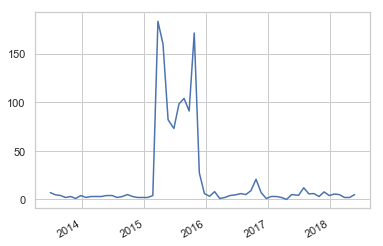

In [377]:
import matplotlib.pyplot as plt
import pandas as pd

#for i in range(5):
row = dd.iloc[0]
row.plot(kind='line')

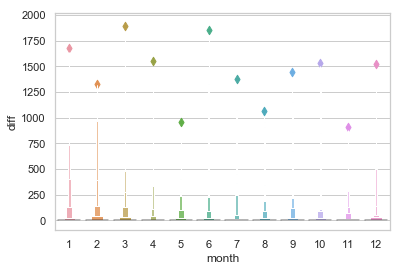

In [173]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxenplot(x=draft1['month'], y=draft1['diff'])


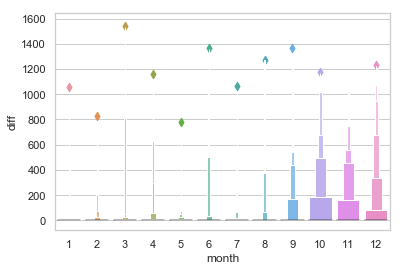

In [174]:
sns.set(style="whitegrid")
ax = sns.boxenplot(x=draft2['month'], y=draft2['diff'])

#4.4

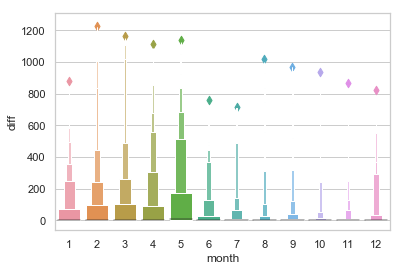

In [175]:
sns.set(style="whitegrid")
ax = sns.boxenplot(x=draft3['month'], y=draft3['diff'])

#4.5


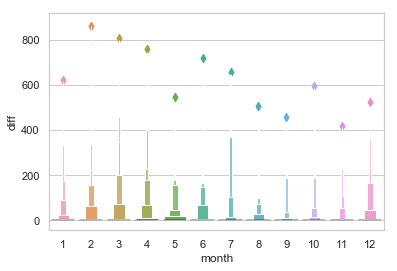

In [176]:
sns.set(style="whitegrid")
ax = sns.boxenplot(x=draft4['month'], y=draft4['diff'])
#4.6


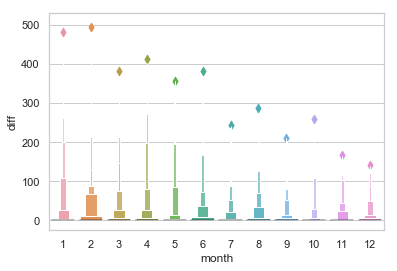

In [177]:
sns.set(style="whitegrid")
ax = sns.boxenplot(x=draft5['month'], y=draft5['diff'])



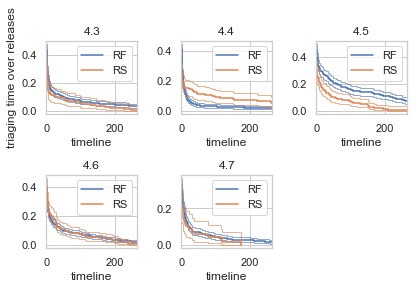

In [43]:
kmf = KaplanMeierFitter()

draft1 = pd.read_csv('db\\aEclipse-RF_4.3.csv')
draft2 = pd.read_csv('db\\aEclipse-RS_4.3.csv')
data1=['4.3',draft1,draft2]
draft3 = pd.read_csv('db\\aEclipse-RF_4.4.csv')
draft4 = pd.read_csv('db\\aEclipse-RS_4.4.csv')
data2=['4.4',draft3,draft4]
draft5 = pd.read_csv('db\\aEclipse-RF_4.5.csv')
draft6 = pd.read_csv('db\\aEclipse-RS_4.5.csv')
data3=['4.5',draft5,draft6]
draft7 = pd.read_csv('db\\aEclipse-RF_4.6.csv')
draft8 = pd.read_csv('db\\aEclipse-RS_4.6.csv')
data4=['4.6',draft7,draft8]
draft9 = pd.read_csv('db\\aEclipse-RF_4.7.csv')
draft10 = pd.read_csv('db\\aEclipse-RS_4.7.csv')
data5=['4.7',draft9,draft10]
allf=[data1,data2,data3,data4,data5]
time=['RF','RS']
for i,file in enumerate(allf):
    ax = plt.subplot(2, 3, i+1)
    for j,dat in enumerate(file):
        if j==0:
            version=dat
        else:
            T = dat["diff"]
            E = dat["done"]
            kmf.fit( T, E, label=time[j-1])
            kmf.plot(ax=ax, ci_force_lines=True)
    plt.title(version)
    plt.xlim(0, 265)
    if i==0:
        plt.ylabel('triaging time over releases')
plt.tight_layout()